In [41]:
import numpy as np
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import scipy as sp

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
df = pd.read_csv("C:/Users/LEGION/anaconda3/wineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


(12.5, -0.5)

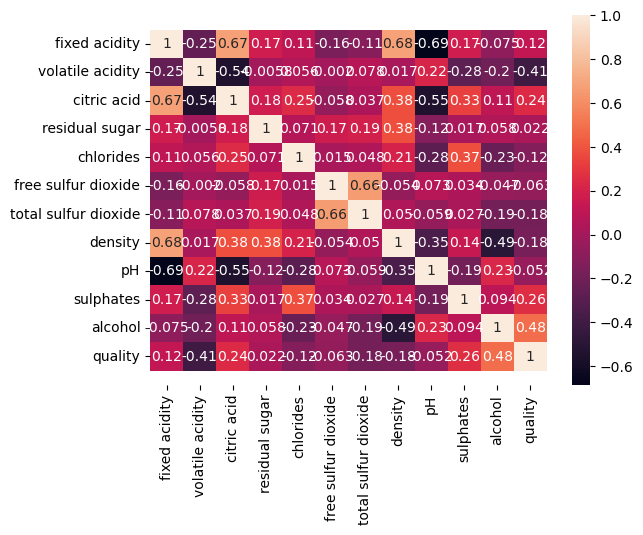

In [6]:
ax = plt.axes()
sb.heatmap(df.corr(), annot = True, ax = ax)
i, k = ax.get_ylim() 
ax.set_ylim(i+0.5, k-0.5)

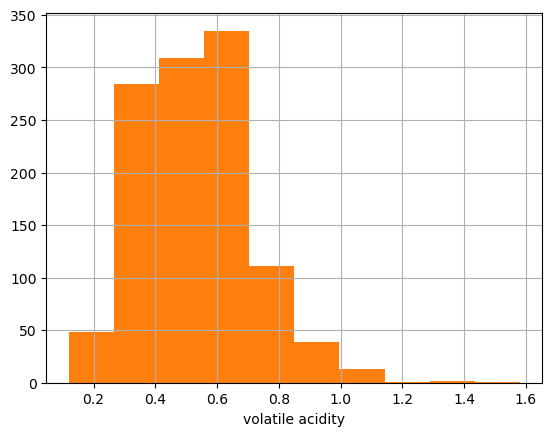

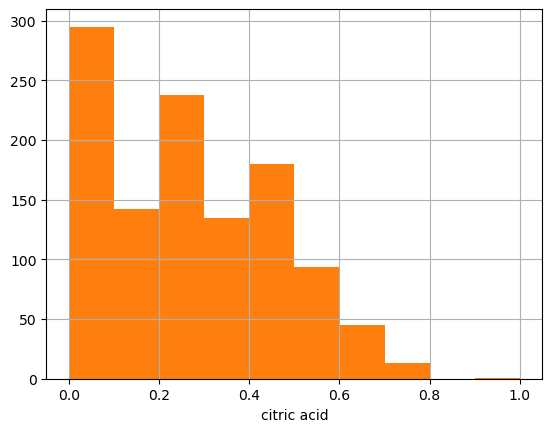

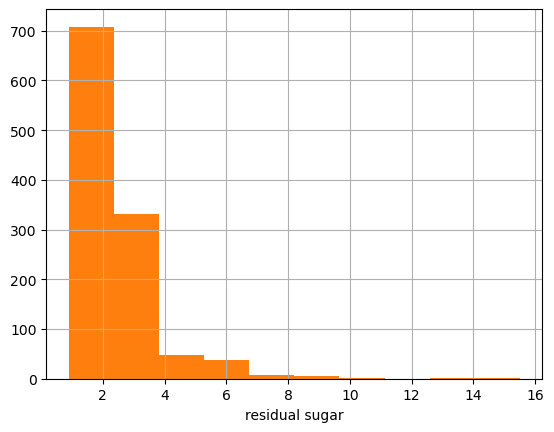

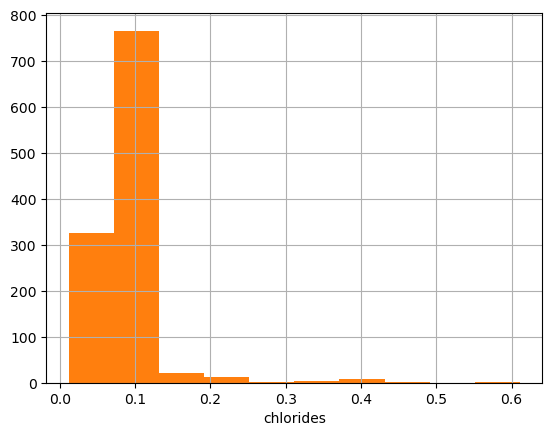

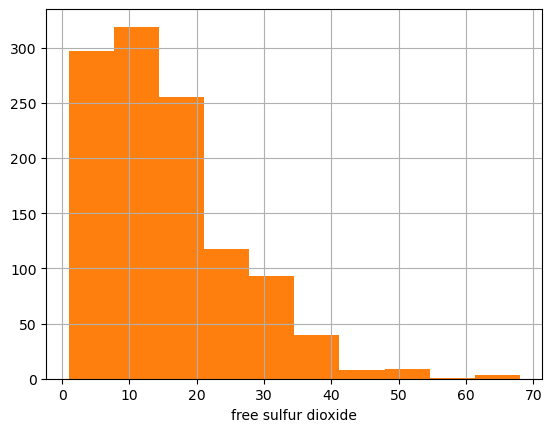

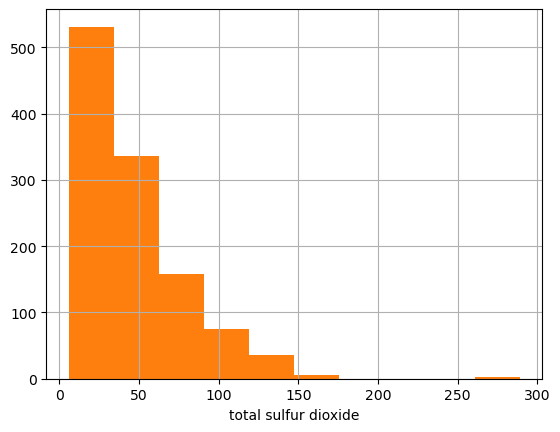

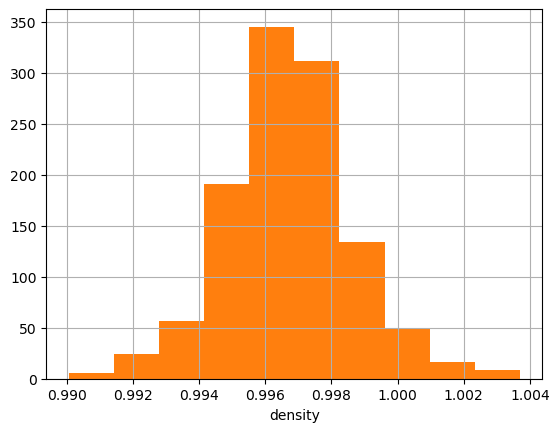

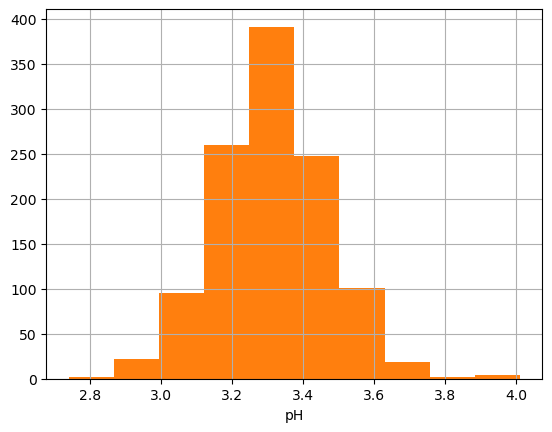

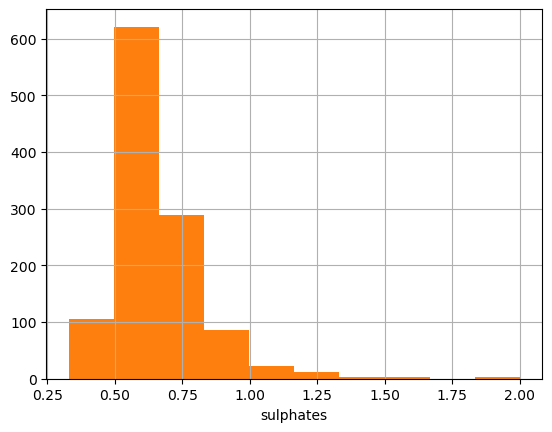

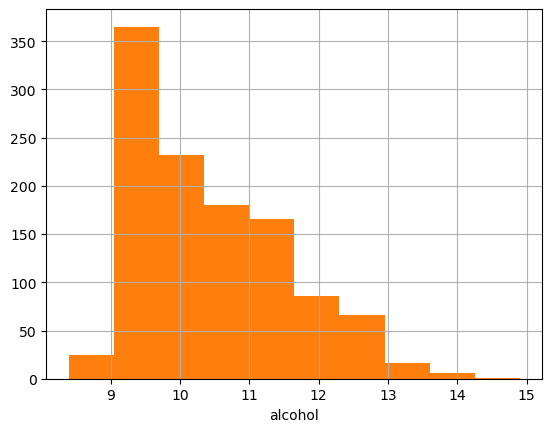

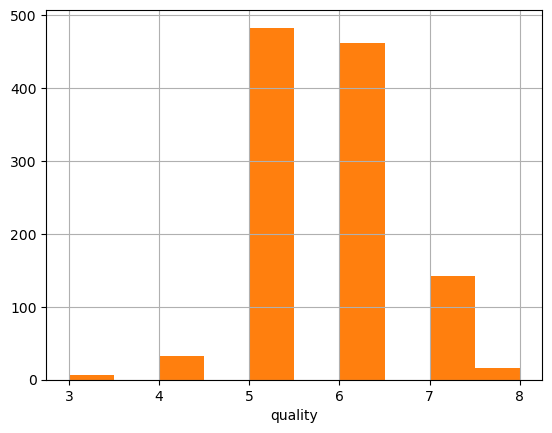

In [7]:
for i in range (1,len(df.columns)):
    hist = df[df.columns[i]].hist()
    plt.hist(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

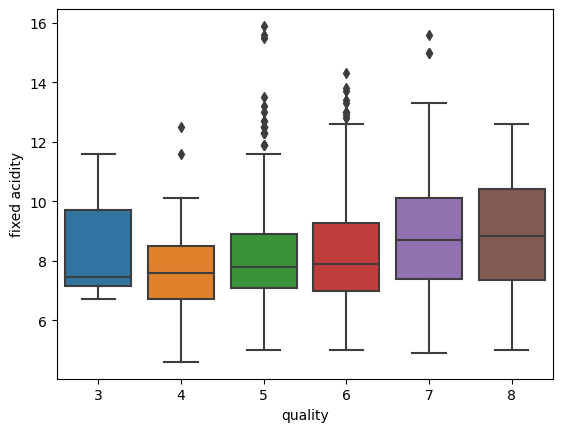

In [8]:
sb.boxplot(x ='quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

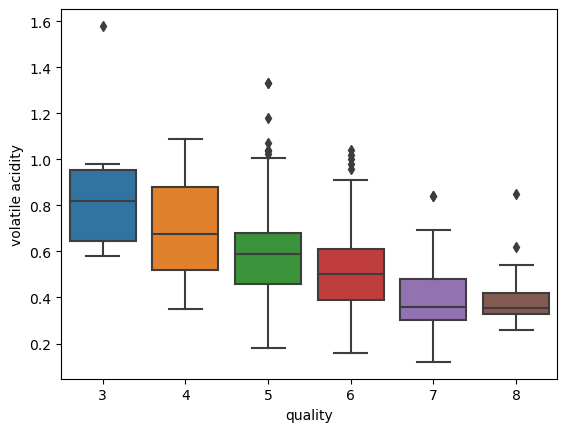

In [9]:
sb.boxplot(x ='quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

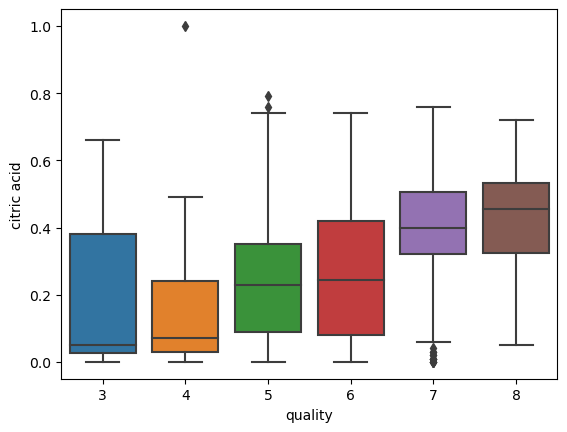

In [10]:
sb.boxplot(x ='quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

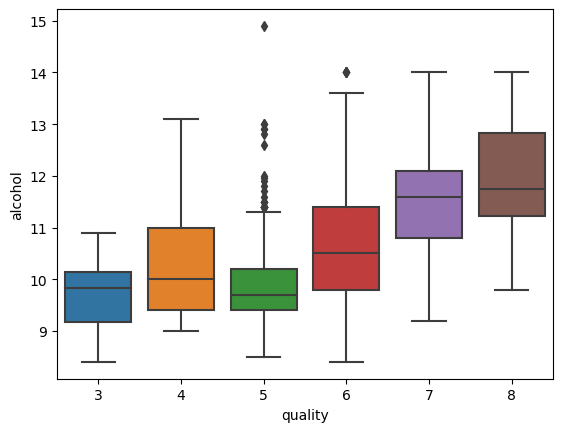

In [13]:
sb.boxplot(x ='quality', y = 'alcohol', data = df)

In [16]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


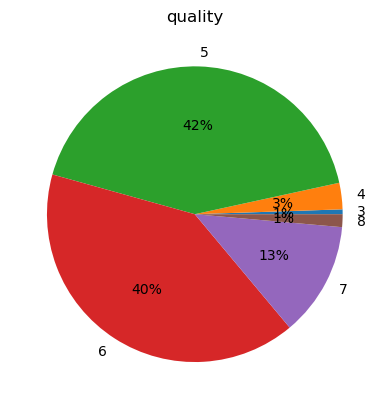

In [17]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality')
plt.show()

In [19]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X,y = sm.fit_resample(X,y)

fixed acidity : 2.09%
volatile acidity : 32.44%
citric acid : 10.16%
residual sugar : 0.19%
chlorides : 1.85%
free sulfur dioxide : 3.28%
total sulfur dioxide : 4.24%
density : 4.52%
pH : 5.20%
sulphates : 7.37%
alcohol : 28.67%


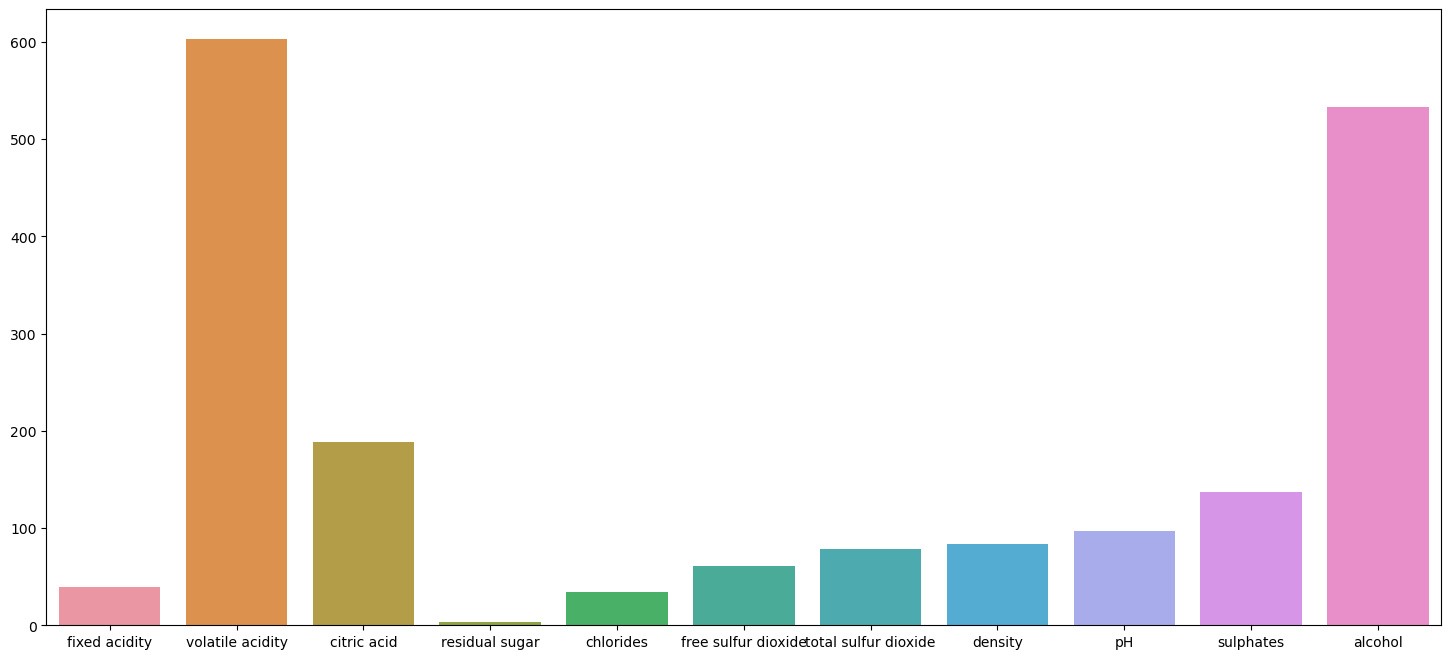

In [26]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
feature_contribution=(fs.scores_/sum(fs.scores_))*100
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sb.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [59]:
X1 = X[['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
X_train, X_test, y_train, y_test=train_test_split(X1, y, test_size = 0.40, stratify = y, random_state = 42)

In [61]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
parameters = {'n_neighbors': np.arange(2,25,1)}

grid = GridSearchCV(KNeighborsClassifier(), parameters, scoring = "accuracy")
grid.fit(X_train, y_train)

knn = grid.best_estimator_
print("Model:", knn)
print('Training score:', knn.score(X_train, y_train))
print('Testing Score:', knn.score(X_test, y_test))

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Model: KNeighborsClassifier(n_neighbors=2)
Training score: 0.9096662830840047
Testin Score: 0.7586206896551724


C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [52]:
def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

    ax = plt.axes()
    CM = confusion_matrix(y_test, y_pred)
    sb.heatmap(CM, annot = True, ax = ax, xticklabels=["3", "4", "5", "6", "7", "8"], yticklabels=["3", "4", "5", "6", "7", "8"])
    ax.set_title('Confusion Matrix')
    i, k = ax.get_ylim() 
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

Model: KNeighborsClassifier(n_neighbors=2)
Training score: 0.9096662830840047
Testing Score: 0.7586206896551724
              precision    recall  f1-score   support

           3       0.92      1.00      0.96       193
           4       0.74      0.94      0.83       193
           5       0.56      0.54      0.55       193
           6       0.52      0.34      0.41       194
           7       0.79      0.78      0.79       194
           8       0.92      0.96      0.94       193

    accuracy                           0.76      1160
   macro avg       0.74      0.76      0.74      1160
weighted avg       0.74      0.76      0.74      1160



C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

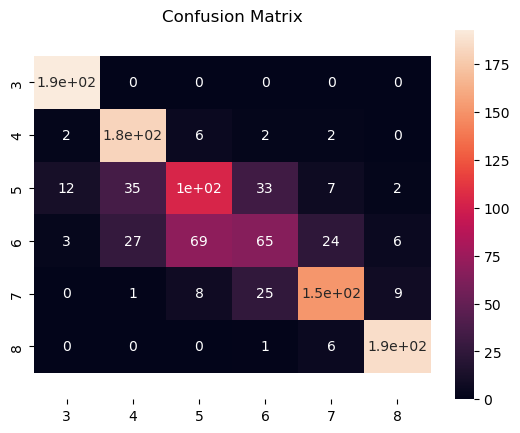

In [74]:
print("Model:", knn)
print('Training score:', knn.score(X_train, y_train))
print('Testing accuracy Score:', knn.score(X_test, y_test))
Metrics(knn, X_test, y_test)

Model: DecisionTreeClassifier(criterion='entropy', random_state=42)
Training score: 1.0
Testing accuracy Score: 0.7336206896551725
              precision    recall  f1-score   support

           3       0.93      0.97      0.95       193
           4       0.79      0.81      0.80       193
           5       0.60      0.53      0.56       193
           6       0.44      0.46      0.45       194
           7       0.74      0.73      0.74       194
           8       0.90      0.90      0.90       193

    accuracy                           0.73      1160
   macro avg       0.73      0.73      0.73      1160
weighted avg       0.73      0.73      0.73      1160



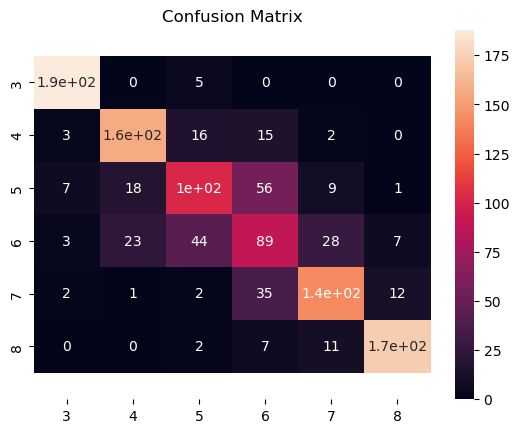

In [81]:
dectree=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train,y_train)
print("Model:", dectree)
print('Training score:', dectree.score(X_train, y_train))
print('Testing accuracy Score:', dectree.score(X_test, y_test))
Metrics(dectree, X_test, y_test)

Model: SVC(random_state=0)
Training score: 0.7123130034522439
Testing accuracy Score: 0.6741379310344827
              precision    recall  f1-score   support

           3       0.85      1.00      0.92       193
           4       0.68      0.64      0.66       193
           5       0.56      0.52      0.54       193
           6       0.52      0.43      0.47       194
           7       0.64      0.53      0.58       194
           8       0.72      0.93      0.81       193

    accuracy                           0.67      1160
   macro avg       0.66      0.67      0.66      1160
weighted avg       0.66      0.67      0.66      1160



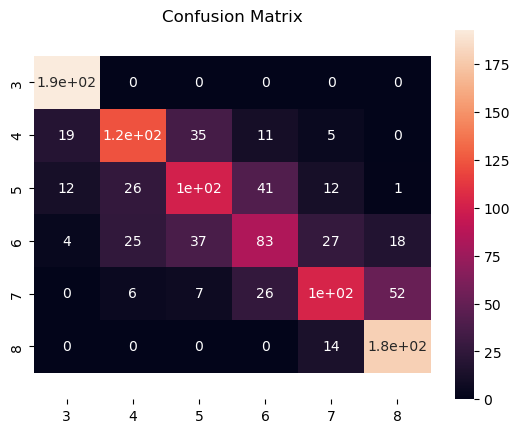

In [80]:
SVM=SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train,y_train)
print("Model:", SVM)
print('Training score:', SVM.score(X_train, y_train))
print('Testing accuracy Score:', SVM.score(X_test, y_test))
Metrics(SVM, X_test, y_test)

Model: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Training score: 0.9948216340621404
Testing accuracy Score: 0.7905172413793103
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       193
           4       0.84      0.89      0.87       193
           5       0.65      0.67      0.66       193
           6       0.56      0.45      0.50       194
           7       0.78      0.79      0.78       194
           8       0.89      0.95      0.92       193

    accuracy                           0.79      1160
   macro avg       0.78      0.79      0.78      1160
weighted avg       0.78      0.79      0.78      1160



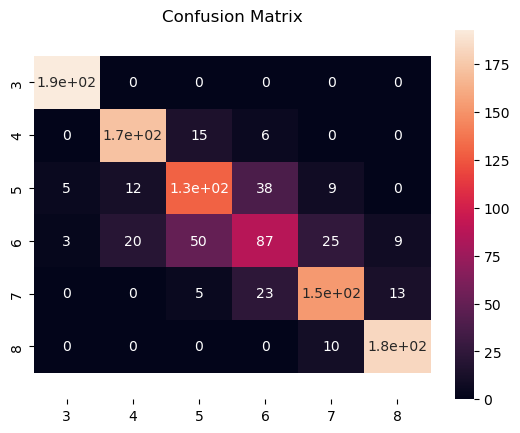

In [79]:
forest=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train,y_train)
print("Model:", forest)
print('Training score:', forest.score(X_train, y_train))
print('Testing accuracy Score:', forest.score(X_test, y_test))
Metrics(forest, X_test, y_test)

Model: AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
Training score: 0.43037974683544306
Testing accuracy Score: 0.44396551724137934
              precision    recall  f1-score   support

           3       0.54      0.98      0.70       193
           4       0.41      0.33      0.36       193
           5       0.52      0.35      0.41       193
           6       0.31      0.33      0.32       194
           7       0.41      0.68      0.51       194
           8       0.00      0.00      0.00       193

    accuracy                           0.44      1160
   macro avg       0.36      0.44      0.38      1160
weighted avg       0.36      0.44      0.38      1160



C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


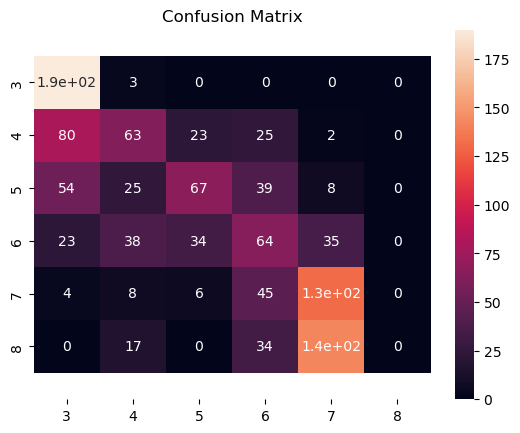

In [84]:
adaboost = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01)
adaboost.fit(X_train, y_train)
print("Model:", adaboost)
print('Training score:', adaboost.score(X_train, y_train))
print('Testing accuracy Score:', adaboost.score(X_test, y_test))
Metrics(adaboost, X_test, y_test)